In [1]:
!pip list

#!pip uninstall tensorflow -y
#!pip uninstall tf-nightly -y

import sys
print(sys.version)

#!pip install tf-nightly-gpu

#https://github.com/tensorflow/tensorflow/issues/37659 reason for nightly

#tensorflo was 2.6.2 downgrade to 1.5.0 via https://www.mlfairy.com/blog/2020/01/31/lstm-coreml/
#keras was  2.6.0, downgrade to 2.2.5 

#!pip uninstall tensorflow -y
#!pip uninstall keras -y

#!pip install keras==2.2.5
#!pip install tensorflow==2.2.0 #try 2.3.1


#!pip install 'h5py==2.10.0' --force-reinstall


# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Package                               Version               Editable project location
------------------------------------- --------------------- -------------------------
absl-py                               0.15.0
accelerate                            0.5.1
access                                1.1.3
affine                                2.3.0
aiobotocore                           2.1.2
aiohttp                               3.8.1
aioitertools                          0.10.0
aiosignal                             1.2.0
albumentations                        1.1.0
alembic                               1.7.7
allennlp                              2.9.1
altair                                4.2.0
annoy                                 1.17.0
ansiwrap                              0.8.4
anyio                                 3.4.0
apache-beam                           2.34.0
aplus                                 0.11.0
appdirs                               1.4.4
argcomplete                    

In [2]:
#imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf # ML/DL
import keras
from keras.models import Sequential
from tensorflow.keras.layers import LSTM
from keras.layers import Activation, Dense, Dropout
import matplotlib.pyplot as plt
import tqdm
import pickle

#tf.compat.v1.enable_eager_execution()
import tensorflow_addons as tfa
#import coremltools as ct

In [3]:
df = pd.read_csv(os.path.join('../input/newencoded/encodedNew.csv'))
#df.drop(axis=1,columns=df.columns[9],inplace=True)
df.head()

,d/l,pu,tpu,rpu,su,tsu,rsu,sq,tsq,rsq,bp,tbp,rbp
0,4,8,10,18,25,35,42,56,70,2,63,80,0
1,1,3,25,28,3,15,61,7,50,6,6,50,25
2,2,21,55,19,24,70,10,10,30,2,13,40,27
3,2,12,30,45,12,35,6,8,25,7,28,80,0
4,4,11,15,53,12,15,5,20,25,36,48,60,17


In [4]:
STOP_SIGN = "␣"   
allWorkoutsString = []


##NEW SHUFFLING TO FIX POOR EARLY PERFORMANCE
print(df.head())
df = df.sample(frac = 1)
print(df.head())
##NEW SHUFFLING TO FIX POOR EARLY PERFORMANCE

for i in range(len(df)):
    workout = (str(df.iloc[i]["d/l"]) + "-DL:~" + str(df.iloc[i]["pu"]) + "~" + str(df.iloc[i]["tpu"]) + "~" + str(df.iloc[i]["rpu"]) + "~" + str(df.iloc[i]["su"]) + "~" + str(df.iloc[i]["tsu"]) + "~" + str(df.iloc[i]["rsu"]) + "~" + str(df.iloc[i]["sq"]) + "~" + str(df.iloc[i]["tsq"]) + "~" + str(df.iloc[i]["rsq"]) + "~"  +  str(df.iloc[i]["bp"]) + "~" + str(df.iloc[i]["tbp"]) + "~" + str(df.iloc[i]["rbp"]) + "~" + "␣" )
    allWorkoutsString.append(workout)
    
for j in range(len(allWorkoutsString)):
    print(allWorkoutsString[j])





   d/l  pu  tpu  rpu  su  tsu  rsu  sq  tsq  rsq  bp  tbp  rbp
0    4   8   10   18  25   35   42  56   70    2  63   80    0
1    1   3   25   28   3   15   61   7   50    6   6   50   25
2    2  21   55   19  24   70   10  10   30    2  13   40   27
3    2  12   30   45  12   35    6   8   25    7  28   80    0
4    4  11   15   53  12   15    5  20   25   36  48   60   17
      d/l  pu  tpu  rpu  su  tsu  rsu  sq  tsq  rsq  bp  tbp  rbp
1181    3  27   50   12  14   25   13  42   75    3  40   70    4
1311    4  41   55   19  54   70    1  19   25   34  18   25   32
127     5  57   60    3  15   15   64  35   35    4  36   40   19
1298    2   8   20   26  19   55    3   8   20   15  23   70    3
1259    1   9   50    8  11   70    5   2   10   15  12   75    4
3-DL:~27~50~12~14~25~13~42~75~3~40~70~4~␣
4-DL:~41~55~19~54~70~1~19~25~34~18~25~32~␣
5-DL:~57~60~3~15~15~64~35~35~4~36~40~19~␣
2-DL:~8~20~26~19~55~3~8~20~15~23~70~3~␣
1-DL:~9~50~8~11~70~5~2~10~15~12~75~4~␣
4-DL:~41~55~13~11~15

In [5]:
def decodeWorkout(input):    
    c = input.split("~")
    if(len(c) == 5):
        pushupStr = str(c[0] + "\n" + c[1] + " pushups for " + c[2] + " seconds with " + c[3] + " second rest ")
        outputStr = (pushupStr)
    elif(len(c) == 8):
        pushupStr = str(c[0] + "\n" + c[1] + " pushups for " + c[2] + " seconds with " + c[3] + " second rest ")
        situpStr = str("\n" + c[4] + " situps for " + c[5] + " seconds with " + c[6] + " second rest ")
        outputStr = (pushupStr + situpStr)
    elif(len(c)==11):
        pushupStr = str(c[0] + "\n" + c[1] + " pushups for " + c[2] + " seconds with " + c[3] + " second rest ")
        situpStr = str("\n" + c[4] + " situps for " + c[5] + " seconds with " + c[6] + " second rest ")
        squatStr = str("\n" + c[7] + " squats for " + c[8] + " seconds with " + c[9] + " second rest ")
        outputStr = (pushupStr + situpStr + squatStr)
    elif(len(c) == 14):
        pushupStr = str(c[0] + "\n" + c[1] + " pushups for " + c[2] + " seconds with " + c[3] + " second rest ")
        situpStr = str("\n" + c[4] + " situps for " + c[5] + " seconds with " + c[6] + " second rest ")
        squatStr = str("\n" + c[7] + " squats for " + c[8] + " seconds with " + c[9] + " second rest ")
        burpeeStr = str("\n" + c[10] + " burpees for " + c[11] + " seconds with " + c[12] + " second rest ")
        outputStr = (pushupStr + situpStr + squatStr + burpeeStr)
    else:
        outputStr = "fail"
    
    return outputStr
for i in range(15) :
        print(decodeWorkout(allWorkoutsString[i]))


3-DL:
27 pushups for 50 seconds with 12 second rest 
14 situps for 25 seconds with 13 second rest 
42 squats for 75 seconds with 3 second rest 
40 burpees for 70 seconds with 4 second rest 
4-DL:
41 pushups for 55 seconds with 19 second rest 
54 situps for 70 seconds with 1 second rest 
19 squats for 25 seconds with 34 second rest 
18 burpees for 25 seconds with 32 second rest 
5-DL:
57 pushups for 60 seconds with 3 second rest 
15 situps for 15 seconds with 64 second rest 
35 squats for 35 seconds with 4 second rest 
36 burpees for 40 seconds with 19 second rest 
2-DL:
8 pushups for 20 seconds with 26 second rest 
19 situps for 55 seconds with 3 second rest 
8 squats for 20 seconds with 15 second rest 
23 burpees for 70 seconds with 3 second rest 
1-DL:
9 pushups for 50 seconds with 8 second rest 
11 situps for 70 seconds with 5 second rest 
2 squats for 10 seconds with 15 second rest 
12 burpees for 75 seconds with 4 second rest 
4-DL:
41 pushups for 55 seconds with 13 second rest 
1

In [6]:
#encoding each of the characters into integers so the model can understand -> paying special attention to the stop_sign
tokenizer = tf.keras.preprocessing.text.Tokenizer(
    char_level=True, #could attempt to make this non-char level
    filters='',
    lower=False,
    split=''
)
# Stop word is not a part of workouts, but tokenizer must know about it as well.
#tokenizer.fit_on_texts([STOP_SIGN]) #come back
tokenizer.fit_on_texts(allWorkoutsString)
tokenizer.get_config()

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [7]:
VOCABULARY_SIZE = len(tokenizer.word_counts) + 1 #idk why its +1
print('VOCABULARY_SIZE: ', VOCABULARY_SIZE)

VOCABULARY_SIZE:  17


In [8]:
dataset_vectorized = tokenizer.texts_to_sequences(allWorkoutsString)
print('Vectorized dataset size', len(dataset_vectorized))


Vectorized dataset size 1500


In [9]:
def decodeVector(vector):
    decodedWorkout = tokenizer.sequences_to_texts([vector])[0]
    print(decodedWorkout)
    
#basic test to see if the decoder is working
decodeVector(dataset_vectorized[0])

3 - D L : ~ 2 7 ~ 5 0 ~ 1 2 ~ 1 4 ~ 2 5 ~ 1 3 ~ 4 2 ~ 7 5 ~ 3 ~ 4 0 ~ 7 0 ~ 4 ~ ␣


In [10]:
#add padding to ensure same length --- only if all are not the sane length
print(len(dataset_vectorized))
maxLength = 0
for workout_index, workout in enumerate(dataset_vectorized[:len(dataset_vectorized)]):
    #if(len(workout)) != 167:
    if(maxLength < len(workout)):
        #print('Workout #{} length: {}'.format(workout_index + 1, len(workout)))
        maxLength = len(workout)
#padding is required
print(maxLength)

1500
43


In [11]:
dataset_vectorized_padded_without_stops = tf.keras.preprocessing.sequence.pad_sequences(
    dataset_vectorized,
    padding='post',
    truncating='post',
    # We use -1 here and +1 in the next step to make sure
    # that all recipes will have at least 1 stops sign at the end,
    # since each sequence will be shifted and truncated afterwards
    # (to generate X and Y sequences).
    maxlen=maxLength-1,
    #value=tokenizer.texts_to_sequences([STOP_SIGN])[0]
)
dataset_vectorized_padded = tf.keras.preprocessing.sequence.pad_sequences(
    dataset_vectorized_padded_without_stops,
    padding='post',
    truncating='post',
    maxlen=maxLength+1,
    #value=tokenizer.texts_to_sequences([STOP_SIGN])[0]
)

for workout_index, workout in enumerate(dataset_vectorized_padded[:len(dataset_vectorized_padded)]):
    if(len(workout)) != maxLength+1:
        print('Workout #{} length: {}'.format(workout_index + 1, len(workout)))

#test it out
decodeVector(dataset_vectorized_padded[0])

3 - D L : ~ 2 7 ~ 5 0 ~ 1 2 ~ 1 4 ~ 2 5 ~ 1 3 ~ 4 2 ~ 7 5 ~ 3 ~ 4 0 ~ 7 0 ~ 4 ~ ␣


In [12]:
#converting to tensors
dataset = tf.data.Dataset.from_tensor_slices(dataset_vectorized_padded)

#confirming the concept
#for workout in dataset.take(1):
#    print('Raw workout:\n', workout.numpy(), '\n\n\n')
#    print('Stringified workout:\n')
#    decodeVector(workout.numpy())
#doesnt work with my downgraded tensorflow and keras

2022-04-23 23:52:59.209589: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-23 23:52:59.294306: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-23 23:52:59.295036: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-23 23:52:59.298169: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [13]:
#split processing
def split_input_target(workout):
    input_text = workout[:-1]
    target_text = workout[1:]
    
    return input_text, target_text
dataset_targeted = dataset.map(split_input_target)
print(dataset_targeted)

<MapDataset shapes: ((43,), (43,)), types: (tf.int32, tf.int32)>


In [14]:
#??

#downgraded tensorflow and keras prevents this from working


#for input_example, target_example in dataset_targeted.take(1):
#    print('Input sequence size:', repr(len(input_example.numpy())))
#    print('Target sequence size:', repr(len(target_example.numpy())))
#    print()
#    
#    input_stringified = tokenizer.sequences_to_texts([input_example.numpy()[:50]])[0]
#    target_stringified = tokenizer.sequences_to_texts([target_example.numpy()[:50]])[0]
#    
#    print('Input:  ', repr(''.join(input_stringified)))
#    print('Target: ', repr(''.join(target_stringified)))
#
#
#for i, (input_idx, target_idx) in enumerate(zip(input_example[:10], target_example[:10])):
#    print('Step {:2d}'.format(i + 1))
#    print('  input: {} ({:s})'.format(input_idx, repr(tokenizer.sequences_to_texts([[input_idx.numpy()]])[0])))
#    print('  expected output: {} ({:s})'.format(target_idx, repr(tokenizer.sequences_to_texts([[target_idx.numpy()]])[0])))

In [15]:
print(dataset_targeted)

total_workouts_num = len(df)
print('total_workouts_num : ', total_workouts_num)
print('maxLength: ', maxLength)
print('VOCABULARY_SIZE: ', VOCABULARY_SIZE)

<MapDataset shapes: ((43,), (43,)), types: (tf.int32, tf.int32)>
total_workouts_num :  1500
maxLength:  43
VOCABULARY_SIZE:  17


In [16]:
# Batch size.
BATCH_SIZE = 64 
# Buffer size to shuffle the dataset (TF data is designed to work
# with possibly infinite sequences, so it doesn't attempt to shuffle
# the entire sequence in memory. Instead, it maintains a buffer in
# which it shuffles elements).
SHUFFLE_BUFFER_SIZE = 1000
dataset_train = dataset_targeted \
  .shuffle(SHUFFLE_BUFFER_SIZE) \
  .batch(BATCH_SIZE, drop_remainder=True) \
  .repeat()
print(dataset_train)

<RepeatDataset shapes: ((64, 43), (64, 43)), types: (tf.int32, tf.int32)>


In [17]:
#embedding layer
tmp_vocab_size = 10
tmp_embedding_size = 5
tmp_input_length = 8
tmp_batch_size = 2
tmp_model = tf.keras.models.Sequential()
tmp_model.add(tf.keras.layers.Embedding(
  input_dim=tmp_vocab_size,
  output_dim=tmp_embedding_size,
  input_length=tmp_input_length
))
# The model will take as input an integer matrix of size (batch, input_length).
# The largest integer (i.e. word index) in the input should be no larger than 9 (tmp_vocab_size).
# Now model.output_shape == (None, 10, 64), where None is the batch dimension.
tmp_input_array = np.random.randint(
  low=0,
  high=tmp_vocab_size,
  size=(tmp_batch_size, tmp_input_length) #come back
)
tmp_model.compile('rmsprop', 'mse')
tmp_output_array = tmp_model.predict(tmp_input_array)
print('tmp_input_array shape:', tmp_input_array.shape)
print('tmp_input_array:')
print(tmp_input_array)
print()
print('tmp_output_array shape:', tmp_output_array.shape)
print('tmp_output_array:')
print(tmp_output_array)

tmp_input_array shape: (2, 8)
tmp_input_array:
[[6 2 8 0 3 3 3 7]
 [0 7 4 8 8 2 3 1]]

tmp_output_array shape: (2, 8, 5)
tmp_output_array:
[[[-0.04933068 -0.00357653  0.02657297 -0.0080298  -0.00123465]
  [-0.01761947 -0.03390051  0.04399535  0.03967755 -0.024812  ]
  [-0.02743425 -0.04254794  0.04559615  0.01850568 -0.03567716]
  [ 0.01933767  0.0437505   0.04923921  0.00838044  0.00054278]
  [ 0.01893603  0.01294596  0.02710019  0.03980741 -0.014482  ]
  [ 0.01893603  0.01294596  0.02710019  0.03980741 -0.014482  ]
  [ 0.01893603  0.01294596  0.02710019  0.03980741 -0.014482  ]
  [-0.00972863 -0.0266986  -0.0291931  -0.02026252 -0.02116348]]

 [[ 0.01933767  0.0437505   0.04923921  0.00838044  0.00054278]
  [-0.00972863 -0.0266986  -0.0291931  -0.02026252 -0.02116348]
  [-0.02292267  0.02761661 -0.00197858 -0.0122838  -0.02421749]
  [-0.02743425 -0.04254794  0.04559615  0.01850568 -0.03567716]
  [-0.02743425 -0.04254794  0.04559615  0.01850568 -0.03567716]
  [-0.01761947 -0.03390051 

2022-04-23 23:53:02.138633: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [18]:
#LSTM model -> review

def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        batch_input_shape=[batch_size, None]
    ))
    model.add(tf.keras.layers.LSTM(
        units=rnn_units,
        return_sequences=True,
        stateful=True, #look into this causing the issue potentially, originally was True
        recurrent_initializer=tf.keras.initializers.GlorotNormal() #used to be be tf.keras.initializers.GlorotNormal() before downgradingf
    )) # temp removed
    model.add(tf.keras.layers.Dense(vocab_size))
    
    return model
model = build_model(
  vocab_size=VOCABULARY_SIZE,
  embedding_dim=256,
  rnn_units=1024,
  batch_size=BATCH_SIZE
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (64, None, 256)           4352      
_________________________________________________________________
lstm (LSTM)                  (64, None, 1024)          5246976   
_________________________________________________________________
dense (Dense)                (64, None, 17)            17425     
Total params: 5,268,753
Trainable params: 5,268,753
Non-trainable params: 0
_________________________________________________________________


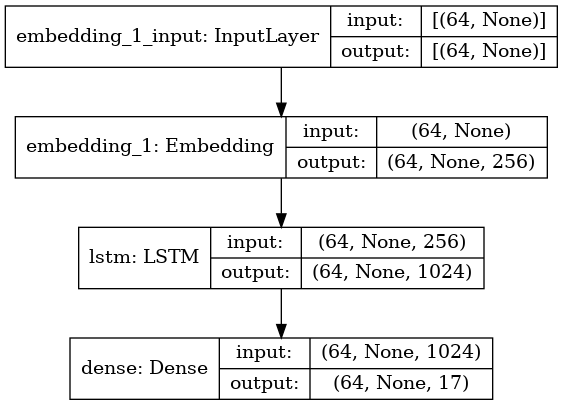

In [19]:
#plotting the model itself
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
    to_file='model.png'
)

In [20]:
#opt, loss funct. 
# An objective function.
# The function is any callable with the signature scalar_loss = fn(y_true, y_pred).
def loss(labels, logits):
    entropy = tf.keras.losses.sparse_categorical_crossentropy(
      y_true=labels,
      y_pred=logits,
      from_logits=True
    )
    
    return entropy
#compile

adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) #used to be 0.001 which worked much better
model.compile(
    optimizer=adam_optimizer,
    loss=loss
)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    patience=5,
    monitor='loss',
    restore_best_weights=True,
    verbose=1
)

In [21]:
# Create a checkpoints directory. TO SAVE AND CONTINUE TRAINING
checkpoint_dir = 'tmp/checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt_') #used to be ckpt_{epoch}, got rid due to space issues on kaggle
checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True
)

tqdm_callback = tfa.callbacks.TQDMProgressBar()

In [22]:
#const
EPOCHS = 100 #1.3k seemed to work well
INITIAL_EPOCH = 1
STEPS_PER_EPOCH = int(len(df)/BATCH_SIZE)
print('EPOCHS:          ', EPOCHS) 
print('INITIAL_EPOCH:   ', INITIAL_EPOCH)
print('STEPS_PER_EPOCH: ', STEPS_PER_EPOCH) #default was 1500

EPOCHS:           100
INITIAL_EPOCH:    1
STEPS_PER_EPOCH:  23


In [23]:
history = model.fit(
    x=dataset_train,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    initial_epoch=INITIAL_EPOCH,
    callbacks=[
        checkpoint_callback,
        tqdm_callback
       # early_stopping_callback #we want to overfit this so get rid of early stopping
    ]
)
# Saving the trained model to file (to be able to re-use it later).
model_name = 'LSTM_WORKOUT_GEN_0.1_raw.h5'
#model.save(model_name, save_format='h5')
#model.save(f"{model_name}~AFTERTRAIN")

Training:   0%|           0/100 ETA: ?s,  ?epochs/s

Epoch 2/100
Epoch 2/100


0/23           ETA: ?s - 

2022-04-23 23:53:05.794851: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


23/23 [==============================] - 4s 25ms/step - loss: 2.4941
Epoch 3/100
Epoch 3/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 2.2556
Epoch 4/100
Epoch 4/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 1.4559
Epoch 5/100
Epoch 5/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 1.2485
Epoch 6/100
Epoch 6/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 1.1251
Epoch 7/100
Epoch 7/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 1.0365
Epoch 8/100
Epoch 8/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.9841
Epoch 9/100
Epoch 9/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.9597
Epoch 10/100
Epoch 10/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.9367
Epoch 11/100
Epoch 11/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 1.0572
Epoch 12/100
Epoch 12/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.9805
Epoch 13/100
Epoch 13/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.9414
Epoch 14/100
Epoch 14/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.9094
Epoch 15/100
Epoch 15/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.8928
Epoch 16/100
Epoch 16/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.8810
Epoch 17/100
Epoch 17/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.8678
Epoch 18/100
Epoch 18/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.8553
Epoch 19/100
Epoch 19/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.8525
Epoch 20/100
Epoch 20/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.8294
Epoch 21/100
Epoch 21/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.8220
Epoch 22/100
Epoch 22/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.8115
Epoch 23/100
Epoch 23/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.7989
Epoch 24/100
Epoch 24/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.7869
Epoch 25/100
Epoch 25/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.7789
Epoch 26/100
Epoch 26/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.7807
Epoch 27/100
Epoch 27/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.7855
Epoch 28/100
Epoch 28/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.7650
Epoch 29/100
Epoch 29/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.7535
Epoch 30/100
Epoch 30/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.7770
Epoch 31/100
Epoch 31/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.7720
Epoch 32/100
Epoch 32/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.7485
Epoch 33/100
Epoch 33/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.7396
Epoch 34/100
Epoch 34/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.7317
Epoch 35/100
Epoch 35/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.7303
Epoch 36/100
Epoch 36/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.7231
Epoch 37/100
Epoch 37/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.7164
Epoch 38/100
Epoch 38/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.7163
Epoch 39/100
Epoch 39/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.7140
Epoch 40/100
Epoch 40/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.7086
Epoch 41/100
Epoch 41/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.7067
Epoch 42/100
Epoch 42/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.7032
Epoch 43/100
Epoch 43/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.7006
Epoch 44/100
Epoch 44/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.6984
Epoch 45/100
Epoch 45/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.7005
Epoch 46/100
Epoch 46/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.6923
Epoch 47/100
Epoch 47/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.6899
Epoch 48/100
Epoch 48/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.6865
Epoch 49/100
Epoch 49/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.6857
Epoch 50/100
Epoch 50/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.6825
Epoch 51/100
Epoch 51/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.6802
Epoch 52/100
Epoch 52/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.6809
Epoch 53/100
Epoch 53/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.6757
Epoch 54/100
Epoch 54/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.6706
Epoch 55/100
Epoch 55/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.6672
Epoch 56/100
Epoch 56/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.6662
Epoch 57/100
Epoch 57/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.6637
Epoch 58/100
Epoch 58/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.6577
Epoch 59/100
Epoch 59/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.6542
Epoch 60/100
Epoch 60/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.6493
Epoch 61/100
Epoch 61/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.6461
Epoch 62/100
Epoch 62/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.6401
Epoch 63/100
Epoch 63/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.6371
Epoch 64/100
Epoch 64/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.6301
Epoch 65/100
Epoch 65/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.6241
Epoch 66/100
Epoch 66/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.6182
Epoch 67/100
Epoch 67/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.6149
Epoch 68/100
Epoch 68/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.6044
Epoch 69/100
Epoch 69/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.6041
Epoch 70/100
Epoch 70/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.6166
Epoch 71/100
Epoch 71/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.5963
Epoch 72/100
Epoch 72/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.5803
Epoch 73/100
Epoch 73/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.7742
Epoch 74/100
Epoch 74/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.6566
Epoch 75/100
Epoch 75/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.5979
Epoch 76/100
Epoch 76/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.5695
Epoch 77/100
Epoch 77/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.5513
Epoch 78/100
Epoch 78/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.5372
Epoch 79/100
Epoch 79/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.5210
Epoch 80/100
Epoch 80/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.5101
Epoch 81/100
Epoch 81/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.4927
Epoch 82/100
Epoch 82/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.4766
Epoch 83/100
Epoch 83/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.4628
Epoch 84/100
Epoch 84/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.4443
Epoch 85/100
Epoch 85/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.4361
Epoch 86/100
Epoch 86/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.4197
Epoch 87/100
Epoch 87/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.3922
Epoch 88/100
Epoch 88/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.3764
Epoch 89/100
Epoch 89/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.3577
Epoch 90/100
Epoch 90/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.3369
Epoch 91/100
Epoch 91/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.3209
Epoch 92/100
Epoch 92/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.3037
Epoch 93/100
Epoch 93/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.2875
Epoch 94/100
Epoch 94/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.2739
Epoch 95/100
Epoch 95/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.2646
Epoch 96/100
Epoch 96/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.2522
Epoch 97/100
Epoch 97/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.2398
Epoch 98/100
Epoch 98/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.2311
Epoch 99/100
Epoch 99/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.2216
Epoch 100/100
Epoch 100/100


0/23           ETA: ?s - 

23/23 [==============================] - 1s 24ms/step - loss: 0.2161


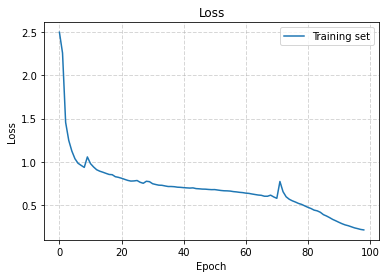

In [24]:
#vis stuff
def render_training_history(training_history):
    loss = training_history.history['loss']
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)
    plt.show()
render_training_history(history)

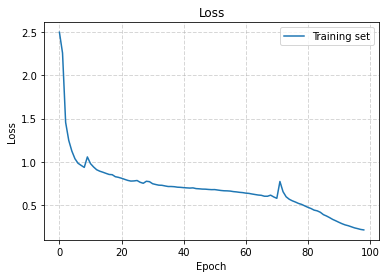

In [25]:
def render_training_history(training_history):
    loss = training_history.history['loss']
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)
    plt.show()
render_training_history(history)

In [26]:
tf.train.latest_checkpoint(checkpoint_dir)

model.save("baselineModel.h5")

vocab_size=VOCABULARY_SIZE
embedding_dim=256
rnn_units=1024

simplified_batch_size = 1
model_simplified = build_model(vocab_size, embedding_dim, rnn_units, simplified_batch_size)
model_simplified.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
model_simplified.build(tf.TensorShape([simplified_batch_size, None]))
model_simplified.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (1, None, 256)            4352      
_________________________________________________________________
lstm_1 (LSTM)                (1, None, 1024)           5246976   
_________________________________________________________________
dense_1 (Dense)              (1, None, 17)             17425     
Total params: 5,268,753
Trainable params: 5,268,753
Non-trainable params: 0
_________________________________________________________________


In [27]:
def generate_text(model, start_string, num_generate = 1000, temperature=1.0):
    # Evaluation step (generating text using the learned model)
    
    padded_start_string = start_string
    # Converting our start string to numbers (vectorizing).
    input_indices = np.array(tokenizer.texts_to_sequences([padded_start_string]))
    # Empty string to store our results.
    text_generated = []
    # Here batch size == 1.
    model.reset_states()
    for char_index in range(num_generate):
        predictions = model(input_indices)
        # remove the batch dimension
        predictions = tf.squeeze(predictions, 0)
        # Using a categorical distribution to predict the character returned by the model.
        predictions = predictions / temperature
        predicted_id = tf.random.categorical(
            predictions,
            num_samples=1
        )[-1, 0].numpy()
        # We pass the predicted character as the next input to the model
        # along with the previous hidden state.
        input_indices = tf.expand_dims([predicted_id], 0)
        
        next_character = tokenizer.sequences_to_texts(input_indices.numpy())[0]
        text_generated.append(next_character)
        
       # output = ''.join(text_generated)
        
       # output = decodeWorkout(output)
        
    return (padded_start_string + ''.join(text_generated))

In [28]:
print((generate_text(model_simplified, '1-DL:', num_generate = maxLength, temperature=1.0))) #make sure you pass it model_simplified
print(decodeWorkout(generate_text(model_simplified, '1-DL:', num_generate = maxLength, temperature=1.0))) #make sure you pass it model_simplified

1-DL:~25~40~50~2~10~35~␣
fail


In [29]:
def generate_combos(model):
    temps = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
    DL = ["1-DL:","2-DL:","3-DL:","4-DL:","5-DL:"]
    for dl in DL:
        print(f"--------DL: {dl}--------")
        for temp in temps:
            print(f"--------TEMP: {temp}--------")
            print("TEMP: " + dl )
            outputStr = generate_text(model, dl, num_generate = maxLength, temperature = temp)
            print(outputStr)
            print("BELOW IS WHAT IT DECODES")
            print(decodeWorkout(outputStr))
        
    

In [30]:
generate_combos(model_simplified)

--------DL: 1-DL:--------
--------TEMP: 0.1--------
TEMP: 1-DL:
1-DL:~25~40~60~1~␣
BELOW IS WHAT IT DECODES
fail
--------TEMP: 0.2--------
TEMP: 1-DL:
1-DL:~25~40~60~1~␣
BELOW IS WHAT IT DECODES
fail
--------TEMP: 0.3--------
TEMP: 1-DL:
1-DL:~24~40~0~28~70~5~␣
BELOW IS WHAT IT DECODES
1-DL:
24 pushups for 40 seconds with 0 second rest 
28 situps for 70 seconds with 5 second rest 
--------TEMP: 0.4--------
TEMP: 1-DL:
1-DL:~25~40~60~1~␣
BELOW IS WHAT IT DECODES
fail
--------TEMP: 0.5--------
TEMP: 1-DL:
1-DL:~25~40~60~1~␣
BELOW IS WHAT IT DECODES
fail
--------TEMP: 0.6--------
TEMP: 1-DL:
1-DL:~25~40~60~1~␣
BELOW IS WHAT IT DECODES
fail
--------TEMP: 0.7--------
TEMP: 1-DL:
1-DL:~25~40~65~4~␣
BELOW IS WHAT IT DECODES
fail
--------TEMP: 0.8--------
TEMP: 1-DL:
1-DL:~4~25~40~19~␣
BELOW IS WHAT IT DECODES
fail
--------TEMP: 0.9--------
TEMP: 1-DL:
1-DL:~25~40~60~17~␣
BELOW IS WHAT IT DECODES
fail
--------TEMP: 1.0--------
TEMP: 1-DL:
1-DL:~5~40~7~41~45~␣
BELOW IS WHAT IT DECODES
fail
----

In [31]:
#print(generate_text(model_simplified, '3-DL:', num_generate = maxLength, temperature=1.0))

print(decodeWorkout(generate_text(model_simplified, '5-DL:', num_generate = maxLength, temperature=1.0))) #make sure you pass it model_simplified

5-DL:
75 pushups for 80 seconds with 0 second rest 
41 situps for 55 seconds with 11 second rest 


In [32]:
print(decodeWorkout(generate_text(model_simplified, '5-DL:', num_generate = maxLength, temperature=1.0))) #make sure you pass it model_simplified

fail


In [33]:
print(decodeWorkout(generate_text(model_simplified, '5-DL:', num_generate = maxLength, temperature=1.0))) #make sure you pass it model_simplified

5-DL:
75 pushups for 80 seconds with 0 second rest 
42 situps for 45 seconds with 16 second rest 


In [34]:
print(model_simplified.outputs)
print(model_simplified.inputs)

[<KerasTensor: shape=(1, None, 17) dtype=float32 (created by layer 'dense_1')>]
[<KerasTensor: shape=(1, None) dtype=float32 (created by layer 'embedding_2_input')>]


In [35]:
model_simplified.save("simplified_model.h5")
model_simplified.save("simplified_model.savedmodel")


2022-04-23 23:55:51.846126: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


In [36]:
newModel = keras.models.load_model('simplified_model.h5')
print(decodeWorkout(generate_text(newModel, '5-DL:', num_generate = maxLength, temperature=1.0))) #make sure you pass it model_simplified

fail
